## Assignment 2

### Name : Tanveer Sharma
### Roll No. : 22M1062

Link for Video Explanation : https://iitbacin.sharepoint.com/:v:/s/Assignment5745/EWORoKwklfpPqMprfFpUkz8BgNEKn-Z25ciLFXj75anRkQ?e=OfuoEe

### **Objective 1** 

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


#### Task 1
- In this task we have to read the dataset from direct link 
- here initial 77 columns are  input variables from which we will extract the features.
- last two columns represent the classifier data

In [2]:
url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv"
datafile = pd.read_csv(url)

print(datafile)

     DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0    0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1    0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2    0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3    0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4    0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
..        ...       ...       ...       ...       ...       ...       ...   
757  0.394169  0.623696  0.316564  2.104045  3.314706  0.234529  0.200657   
758  0.401739  0.659571  0.321841  2.183930  3.411782  0.236546  0.190826   
759  0.382182  0.586545  0.318545  2.072000  3.073636  0.259636  0.202727   
760  0.365622  0.572209  0.297992  2.004931  2.783551  0.245333  0.190384   
761  0.365605  0.599499  0.301539  2.062813  2.952577  0.248568  0.198819   

     pCAMKII_N   pCREB_N    pELK_N  ...    BCL2_N     pS6_N   pCFOS_N  \
0 

#### Task 2 Exploratory Data Analysis

In [3]:
# Get an overview of the data
print(datafile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

the above code  gives us some basic information regarding the data
- firstly about number of samples in each column
- secondly about the datatype of each column.From here it can be inferred that upto first 77 columns we have float values after that for last two columns we have string data i.e. Classes 

In [4]:
datafile.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,582.000000,567.000000,762.000000,702.000000,762.000000,612.000000,582.000000,582.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,...,0.226365,0.156693,0.136973,0.122095,0.129689,0.450260,0.166017,0.182322,0.206105,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.029564,0.030299,0.029633,0.014928,0.022832,0.062304,0.059256,0.041938,0.058118,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.162642,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,...,0.205750,0.136188,0.116234,0.110655,0.111676,0.407385,0.124382,0.152365,0.164155,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,0.224439,0.150386,0.131542,0.122600,0.126138,0.450500,0.153342,0.174184,0.191754,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471656,0.255064,0.197664,4.493452,0.233947,1.542629,...,0.241714,0.170685,0.150942,0.133617,0.142831,0.488438,0.195401,0.205146,0.235925,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.210908,0.759588,0.479763,0.360692,0.413903,2.129791


The above describe method provides us with the mean value and standard deviation of the each variable. It also gives us range of data in it i.e. the minimun and maximum values.

In [5]:
datafile.isna()#Checking for missing values
#datafile.fillna(datafile.mean())#Fill every empty value by the mean of each value

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
758,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
759,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


the above code is for checking the the missing samples in the variables.
 - We can also use datafile.fillna(datafile.mean())to fill every empty value by the mean of each column(variable)
 - But since we will be using imputation in the further steps we are not using this.

Now we have generated histograms of each variables and heat map of correlation between variables. 
- This is just for the better understanding of data and finding whether we can remove some data varaibles (not relevent or highly correlated) or not.

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object


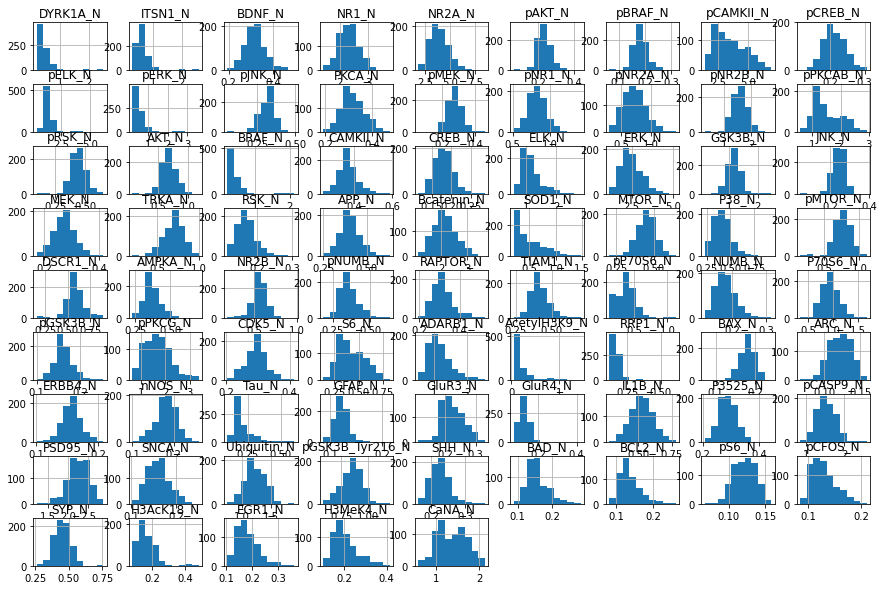

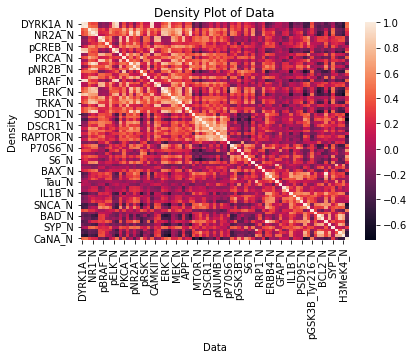

In [6]:
print(datafile.dtypes)

# Generate histograms of all numerical variables in the DataFrame
datafile.hist(figsize=(15,10))
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# Generate a heatmap of the correlation between variables
sns.heatmap(datafile.corr())
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Density Plot of Data')
plt.show()



Now I have dropped some of the variables with samples less than 700

In [7]:
counts = datafile.count()
# Print the counts for each column
print(len(counts))
less_than_700 = counts[counts < 700]
# Print the names of the columns that have less than 700 non-missing values
print(less_than_700.index)
print(less_than_700)
# Drop the columns that have less than 700 non-missing values
datafile = datafile.drop(less_than_700.index, axis=1)
datafile.count()


79
Index(['BAD_N', 'BCL2_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'], dtype='object')
BAD_N        582
BCL2_N       567
H3AcK18_N    612
EGR1_N       582
H3MeK4_N     582
dtype: int64


DYRK1A_N              762
ITSN1_N               762
BDNF_N                762
NR1_N                 762
NR2A_N                762
                     ... 
pCFOS_N               702
SYP_N                 762
CaNA_N                762
Genotype              762
Treatment_Behavior    762
Length: 74, dtype: int64

Therefore we have dropped 5 input variables here.

Now we have used the label encoder to convert our output classes into integer form 
- label_encoder_1 is used for binary classification
- label_encoder_2 is used for quatenary classification
- this code also helps us understand the number of classes i.e. it presents data classification in more clearer way. 

In [8]:
X = datafile.iloc[:, :-2].values
# Example output classes represented as strings
# Initialize the LabelEncoder object
label_encoder_1= LabelEncoder()
label_encoder_2= LabelEncoder()
# Fit the label encoder to the output classes
label_encoder_1.fit(datafile['Genotype'])
label_encoder_2.fit(datafile['Treatment_Behavior'])
# Transform the output classes to numerical values
y1 = label_encoder_1.transform(datafile['Genotype'])
y2 =  label_encoder_2.transform(datafile['Treatment_Behavior']) 
print(X.shape)
print(y1)
print(y2)

(762, 72)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

Now we have drop the one of the two varaibles which have very high correlation.
- for that first we will introduce t- test and try to understand it.
- secondly we will find effect of two variables on binary classification as output values

#### T- Test on Binary Classification Data

In [9]:
# Split the data into two classes based on the target variable
class_1 = X[y1 == 0]
class_2 = X[y1 == 1]

# Perform a t-test for each feature
for i in range(X.shape[1]):
    feature = X[:, i]
    t_statistic, p_value = ttest_ind(class_1[:, i], class_2[:, i])
    print(f"Feature {i}: t-value={t_statistic:.3f}, p-value={p_value:.3f}")


Feature 0: t-value=-2.098, p-value=0.036
Feature 1: t-value=-5.016, p-value=0.000
Feature 2: t-value=1.106, p-value=0.269
Feature 3: t-value=2.604, p-value=0.009
Feature 4: t-value=3.858, p-value=0.000
Feature 5: t-value=-4.491, p-value=0.000
Feature 6: t-value=-1.819, p-value=0.069
Feature 7: t-value=-1.058, p-value=0.291
Feature 8: t-value=-5.787, p-value=0.000
Feature 9: t-value=0.415, p-value=0.678
Feature 10: t-value=-0.262, p-value=0.793
Feature 11: t-value=-1.865, p-value=0.063
Feature 12: t-value=-1.810, p-value=0.071
Feature 13: t-value=-3.531, p-value=0.000
Feature 14: t-value=4.662, p-value=0.000
Feature 15: t-value=3.392, p-value=0.001
Feature 16: t-value=1.615, p-value=0.107
Feature 17: t-value=-2.282, p-value=0.023
Feature 18: t-value=-5.694, p-value=0.000
Feature 19: t-value=2.347, p-value=0.019
Feature 20: t-value=-1.419, p-value=0.156
Feature 21: t-value=-0.175, p-value=0.861
Feature 22: t-value=-3.841, p-value=0.000
Feature 23: t-value=nan, p-value=nan
Feature 24: t-v

The t-value represents the difference between the means of two populations normalized by the standard deviation of the sample. It is calculated as:

t-value = (mean1 - mean2) / (s / sqrt(n))

where mean1 and mean2 are the means of the two populations, s is the pooled standard deviation of the two samples, and n is the number of observations in each sample.

The t-value represents how much the means of the two populations differ in standard deviation units. If the t-value is large, it means that the means are significantly different. Conversely, if the t-value is small, it means that the means are similar.
In feature selection, a higher p-value generally indicates that the null hypothesis, which is that there is no significant difference between the means of the two populations for a particular feature, cannot be rejected. In other words, the feature may not be informative or useful in distinguishing between the two classes.

Therefore, in general, we would want to select features with lower p-values, indicating that there is a significant difference between the means of the two populations for those features. These features may be more informative and useful in distinguishing between the two classes.

In [10]:
corr_matrix = datafile.corr()
target_col = y1#datafile['Genotype']
dropped_columns = []  # create an empty list to store dropped column indices
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            col1 = datafile.iloc[:,[i]]
            col2 = datafile.iloc[:,[j]]
            print(f"highly correlated column pair : ({i},{j})")
            t1_stat, p1_val = ttest_ind(col1, target_col)
            t2_stat, p2_val = ttest_ind(col2, target_col, equal_var=True)
            
            if abs(t1_stat) > abs(t2_stat):
                datafile.drop(col2, axis=1,inplace = True)
                dropped_columns.append(j)  # store the index of the dropped column
                print(f"Dropped column {i}")
            else:
                datafile.drop(col1, axis=1,inplace = True)
                dropped_columns.append(i)  # store the index of the dropped column
                print(f"Dropped column {j}")
                break
print(datafile.shape)
print("Indices of dropped columns:", dropped_columns)

highly correlated column pair : (1,0)
Dropped column 1
highly correlated column pair : (20,0)
Dropped column 0
highly correlated column pair : (68,53)
Dropped column 53
(762, 71)
Indices of dropped columns: [0, 20, 68]


Now to extract features from variables we will import Standard Scaler library and use fit transform method on X to obtain train data.

In [11]:
X = datafile.iloc[:, :-2].values
sc = StandardScaler()
X_train = sc.fit_transform(X)
print(X_train.shape)

(762, 69)


#### Test Data Pre Processing

Now to extract features from test data I have followed the following steps.
- Firstly i have read test data directly from url given in the assignment.
- Next i have dropped columns in the test data file that are not present in the train data file.
- Lastly i have extract features from the test variables by using the fit method on SC which has been transformed using train data.

In [12]:
url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv"
datafile_test = pd.read_csv(url)
datafile_test.isna()#Checking for missing values
#datafile_test.fillna(datafile.mean())#Fill every empty value by the mean of each value
#print(datafile_test)
#datafile_test = datafile_test.drop(less_than_700.index, axis=1)# dropping the variables which has less than 700 samples in train data
cols1 = datafile.columns.tolist()
X_test = datafile_test.iloc[:, :-2].values
# drop columns in the second data file that are not present in the first data file
cols2 = [col for col in datafile_test.columns.tolist() if col in datafile.columns.tolist()]
df2 = datafile_test[cols2]
X_test=df2.iloc[:,:-2].values
y1_test = datafile_test.iloc[:, -1].values
y2_test= datafile_test.iloc[:,-2].values
y1_test = label_encoder_1.transform(datafile_test['Genotype'])
y2_test = label_encoder_2.transform(datafile_test['Treatment_Behavior'])

print(X_test.shape)
X_test = sc.transform(X_test)

print(X_test)

(225, 69)
[[ 1.18181238  2.73333765  1.80570965 ...  1.78836681 -0.38592152
   0.8668492 ]
 [ 1.21032128  3.12051218  1.98654456 ...  1.71373985 -0.03195645
   0.83421424]
 [ 1.22909522  3.22999959  2.22336573 ...  1.41266662 -0.02349083
   0.61436628]
 ...
 [-0.96587811 -1.68047726 -2.86279678 ... -0.22370197  0.74874071
  -0.64042159]
 [-0.94439744 -1.73761389 -2.81611822 ... -0.04886972  1.01405263
  -0.7279485 ]
 [-0.71632517 -0.64841785 -2.10860899 ...  0.08010429  1.49856006
  -0.55261702]]


Below Code is just for better understanding of Test data.

In [13]:
datafile_test.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,225.000000,192.000000,180.000000,225.000000,225.000000,225.000000,195.000000,210.000000,135.000000,225.000000
mean,0.418431,0.604418,0.307015,2.210370,3.706414,0.222746,0.174787,3.122136,0.204005,1.418792,...,0.226364,0.153189,0.125720,0.120754,0.133837,0.435778,0.157493,0.185161,0.183838,1.322796
std,0.190422,0.201370,0.054294,0.365601,0.924539,0.042748,0.029676,0.988197,0.034411,0.366799,...,0.028922,0.027330,0.018422,0.012772,0.026850,0.074845,0.046608,0.039516,0.040776,0.271271
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.121000,0.107649,1.343998,0.127401,0.720767,...,0.155869,0.112027,0.092127,0.083798,0.096318,0.280925,0.093495,0.132944,0.115270,0.848214
25%,0.263753,0.441643,0.270306,1.966810,3.046653,0.190877,0.148023,2.375283,0.180728,1.202446,...,0.206842,0.129688,0.112112,0.110874,0.116388,0.374930,0.118882,0.155311,0.152578,1.092526
50%,0.332816,0.567888,0.304595,2.217320,3.640913,0.223688,0.179132,2.936090,0.204940,1.413711,...,0.220629,0.148787,0.121247,0.121823,0.126947,0.439068,0.152941,0.175659,0.176857,1.305780
75%,0.567562,0.736371,0.337207,2.475121,4.297345,0.250863,0.193840,3.907035,0.225514,1.641213,...,0.239833,0.170947,0.135456,0.129491,0.144324,0.499028,0.184233,0.206926,0.206271,1.564925
max,0.992220,1.151506,0.470056,3.073847,6.368257,0.327952,0.274194,5.497302,0.305191,3.034219,...,0.326490,0.238653,0.177576,0.153798,0.256529,0.601743,0.345455,0.337187,0.326087,1.842435


####  Are the classes balanced ?


In [14]:
print("For train data")
# count the frequency of unique values in a column
value_counts_binary = datafile['Genotype'].value_counts()
value_counts_quaternary = datafile['Treatment_Behavior'].value_counts()

print(value_counts_binary) # print the frequency of each class in binary
print(value_counts_quaternary) # print the frequency of each class in quaternary

For train data
Control    435
Ts65Dn     327
Name: Genotype, dtype: int64
Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64


In [15]:
print("For test data")
# count the frequency of unique values in a column
value_counts_binary = datafile_test['Genotype'].value_counts()
value_counts_quaternary = datafile_test['Treatment_Behavior'].value_counts()

print(value_counts_binary) # print the frequency of each class in binary
print(value_counts_quaternary) # print the frequency of each class in quaternary

For test data
Control    135
Ts65Dn      90
Name: Genotype, dtype: int64
Memantine_C/S    60
Memantine_S/C    60
Saline_C/S       60
Saline_S/C       45
Name: Treatment_Behavior, dtype: int64


From above results we can say that 
- for train data in both binary and quatenary classification classes are not balanced.
- for test data in  binary class is not  balanced.
- for test data in quatenary classification first 3 classes are equally present but 4th class is less in frequency. 

#### Task 3
#### Iterative Imputation on Train Data and Test Data

In [16]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)
IterativeImputer(random_state=0)

 # the model learns that the second feature is double the first
X_train=imp.transform(X_train)
X_test=imp.transform(X_test)

Task 4

When evaluating the performance of classification models, there are several metrics that can be used depending on the nature of the classification problem. In this case, we have two separate classification tasks - one is binary, and the other has four classes. Below are some metrics that can be used to evaluate the performance of the classification models:

**Binary classification:**

**Accuracy:** The proportion of correct predictions made by the model.

**Precision:** The proportion of true positive predictions out of all positive predictions made by the model. Precision measures how accurate positive predictions are.

**Recall:** The proportion of true positive predictions out of all actual positive instances in the dataset. Recall measures how well the model identifies positive instances.

**F1 Score:** The harmonic mean of precision and recall. It gives an overall measure of the model's accuracy and ability to make correct predictions.

**ROC AUC :** (Receiver Operating Characteristic Area Under the Curve) is another commonly used metric for evaluating the performance of binary classification models. It measures the ability of a model to distinguish between positive and negative classes and can be useful in situations where the two classes are imbalanced or the cost of false positives and false negatives are different. A model with a higher ROC AUC value indicates better performance in distinguishing between positive and negative instances.

**Multiclass classification:**

 **Accuracy:** The proportion of correct predictions made by the model.

**Macro-averaged F1 Score:** The average of the F1 score for each class. This metric gives equal weight to each class, regardless of class imbalance.

**Micro-averaged F1 Score:** The F1 score calculated by considering all the true positives, false positives, and false negatives for all the classes. This metric gives equal weight to each observation, regardless of class imbalance.

**Weighted F1 Score:** The F1 score weighted by the number of observations in each class. This metric is useful when there is a class imbalance.

**Cohen's Kappa:** A measure of agreement between the predicted and actual labels, which takes into account chance agreement. It can be used for multiclass classification problems.

**ROC AUC score vs. F1 score in multiclass classification**

In a nutshell, the major difference between ROC AUC and F1 is related to class imbalance. Here is a summary of reading many StackOverflow threads on how to choose one over the other:

If we have a high class imbalance, always choose the F1 score because a high F1 score considers both precision and recall. To get a high F1, both false positives and false negatives must be low. On the other hand, ROC AUC can give precious high scores with a high enough number of false positives. Besides, we can also think of the ROC AUC score as the average of F1 scores (both good and bad) evaluated at various thresholds. Always use F1 when we have a class imbalance. Higher ROC AUC does not necessarily mean a better classifier.

###Task 5 a

In [17]:

model1 = LinearSVC()
model1.fit(X_train, y1)
model2 = LinearSVC()
model2.fit(X_train, y2) 
# print prediction results
predictions1 = model1.predict(X_test)
print(classification_report(y1_test, predictions1))
predictions2 = model2.predict(X_test)
print(classification_report(y2_test, predictions2))

# Define the parameter grid to search over
param_grid = {'C': [0.001,0.01,0.1, 1, 10, 100]}

# Create a linear SVM classifier
clf = LinearSVC(max_iter=1000000)

# Perform grid search with 5-fold cross-validation
grid_search1 = GridSearchCV(clf, param_grid, cv=5)
grid_search1.fit(X_train, y1)
grid_search2 = GridSearchCV(clf, param_grid, cv=5)
grid_search2.fit(X_train, y2)
# Print the best parameter and the corresponding mean cross-validation score
print("Best parameter for Binary Classification : ", grid_search1.best_params_)
print("Best score  for Binary Classification: ", grid_search1.best_score_)
print("Best parameter  for Quaternary Classification: ", grid_search2.best_params_)
print("Best score  for Quaternaery Classification: ", grid_search2.best_score_)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.70      0.80       135
           1       0.67      0.91      0.77        90

    accuracy                           0.79       225
   macro avg       0.80      0.81      0.79       225
weighted avg       0.82      0.79      0.79       225

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        60
           1       0.98      1.00      0.99        60
           2       0.80      0.58      0.67        60
           3       1.00      0.98      0.99        45

    accuracy                           0.84       225
   macro avg       0.86      0.85      0.85       225
weighted avg       0.85      0.84      0.84       225

Best parameter for Binary Classification :  {'C': 0.01}
Best score  for Binary Classification:  0.7951668386652906
Best parameter  for Quaternary Classification:  {'C': 0.1}
Best score  for Quaternaery Classification:  0.7019779841761267


Part 5b

In [18]:
model1 = SVC(kernel='rbf')
model1.fit(X_train, y1)
model2 = SVC(kernel='rbf')
model2.fit(X_train, y2) 
# print prediction results
print("Test Data")
predictions1 = model1.predict(X_test)
print(classification_report(y1_test, predictions1))
print(confusion_matrix(y1_test, predictions1))
predictions2 = model2.predict(X_test)
print(classification_report(y2_test, predictions2))
print(confusion_matrix(y2_test, predictions2))


Test Data
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       135
           1       0.84      0.71      0.77        90

    accuracy                           0.83       225
   macro avg       0.83      0.81      0.82       225
weighted avg       0.83      0.83      0.83       225

[[123  12]
 [ 26  64]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        60
           1       0.91      0.85      0.88        60
           2       0.90      0.88      0.89        60
           3       0.83      0.89      0.86        45

    accuracy                           0.88       225
   macro avg       0.88      0.88      0.88       225
weighted avg       0.89      0.88      0.88       225

[[55  0  5  0]
 [ 0 51  1  8]
 [ 7  0 53  0]
 [ 0  5  0 40]]


In [19]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000,10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,0.00001],
              'kernel': ['rbf']} 
grid_1 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5)
grid_1.fit(X_train,y1)
grid_2 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5)
grid_2.fit(X_train,y2)
# fitting the model for grid search
print("Best parameter for Binary Classification : ", grid_1.best_params_)
print("Best score  for Binary Classification: ", grid_1.best_score_)
print("Best parameter  for Quaternary Classification: ", grid_2.best_params_)
print("Best score  for Quaternaery Classification: ", grid_2.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [20]:
model1 = SVC(C= 10, gamma= 0.001, kernel= 'rbf')
model1.fit(X_train, y1)
model2 = SVC(C= 1000, gamma= 0.0001, kernel= 'rbf')
model2.fit(X_train, y2) 
# print prediction results
print("Test Data")
predictions1 = model1.predict(X_test)
print(classification_report(y1_test, predictions1))
print(confusion_matrix(y1_test, predictions1))
predictions2 = model2.predict(X_test)
print(classification_report(y2_test, predictions2))
print(confusion_matrix(y2_test, predictions2))

Test Data
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       135
           1       0.74      0.86      0.79        90

    accuracy                           0.82       225
   macro avg       0.82      0.83      0.82       225
weighted avg       0.83      0.82      0.82       225

[[108  27]
 [ 13  77]]
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        60
           1       0.98      0.98      0.98        60
           2       0.80      0.60      0.69        60
           3       0.98      0.98      0.98        45

    accuracy                           0.84       225
   macro avg       0.86      0.85      0.85       225
weighted avg       0.85      0.84      0.84       225

[[51  0  9  0]
 [ 0 59  0  1]
 [24  0 36  0]
 [ 0  1  0 44]]


Part 5C

Neural network with single ReLU hidden layer and Softmax output

Network Weight Initialization
Ideally, it may be better to use different weight initialization schemes according to the activation function used on each layer.
Mostly uniform distribution is used.

Activation function
Activation functions are used to introduce nonlinearity to models, which allows deep learning models to learn nonlinear prediction boundaries.

Generally, the rectifier activation function is the most popular.

Sigmoid is used in the output layer while making binary predictions. Softmax is used in the output layer while making multi-class predictions.

The output layer is automatically set to use the Softmax activation function since MLPClassifier assumes multi-class classification problems.

In [21]:
model1 = MLPClassifier(activation='relu', solver='adam', random_state=42)
model1.fit(X_train, y1)
model2 = MLPClassifier(activation='relu', solver='adam', random_state=42)
model2.fit(X_train, y2) 
# print prediction results
print("Test Data")
predictions1 = model1.predict(X_test)
print(classification_report(y1_test, predictions1))
print(confusion_matrix(y1_test, predictions1))
predictions2 = model2.predict(X_test)
print(classification_report(y2_test, predictions2))
print(confusion_matrix(y2_test, predictions2))

Test Data
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       135
           1       0.69      0.78      0.73        90

    accuracy                           0.77       225
   macro avg       0.77      0.77      0.77       225
weighted avg       0.78      0.77      0.78       225

[[104  31]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        60
           1       0.89      0.97      0.93        60
           2       0.88      0.73      0.80        60
           3       0.95      0.84      0.89        45

    accuracy                           0.86       225
   macro avg       0.87      0.86      0.86       225
weighted avg       0.87      0.86      0.86       225

[[54  0  6  0]
 [ 0 58  0  2]
 [16  0 44  0]
 [ 0  7  0 38]]


In [22]:
neural_clf = MLPClassifier(activation='relu', solver='adam', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,)],
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

# Define the grid search procedure
grid_1 = GridSearchCV(neural_clf, param_grid, refit = True, verbose = 3,cv=5)
grid_1.fit(X_train,y1)
grid_2 = GridSearchCV(neural_clf, param_grid, refit = True, verbose = 3,cv=5)
grid_2.fit(X_train,y2)
# Fit the grid search to the data
# fitting the model for grid search
print("Best parameter for Binary Classification : ", grid_1.best_params_)
print("Best score  for Binary Classification: ", grid_1.best_score_)
print("Best parameter  for Quaternary Classification: ", grid_2.best_params_)
print("Best score  for Quaternaery Classification: ", grid_2.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.837 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.739 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.605 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.671 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.849 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.784 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.771 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.572 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.618 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.888 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.902 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.706 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.539 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.553 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.849 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.928 total time=   1.4s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.725 total time=   0.7s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.638 total time=   0.7s
[CV 4/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.651 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.829 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.882 total time=   1.0s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.771 total time=   1.6s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.553 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.638 total time=   1.3s
[CV 5/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.875 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.830 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.739 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.605 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.671 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.842 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.784 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.758 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.572 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.618 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.888 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.908 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.706 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.539 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.553 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.849 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.922 total time=   0.8s
[CV 2/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.732 total time=   1.6s
[CV 3/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.618 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.651 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.829 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.863 total time=   0.9s
[CV 2/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.771 total time=   0.7s
[CV 3/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.553 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.638 total time=   0.8s
[CV 5/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.875 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.810 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.739 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.592 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.651 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.855 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.797 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.758 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.572 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.625 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.888 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.876 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.719 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.539 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.592 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.849 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.876 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.739 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.638 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.658 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.836 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.843 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.752 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.566 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.605 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.882 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.797 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.739 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.546 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.658 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.855 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.850 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.778 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.651 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.645 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.875 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.843 total time=   2.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.797 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.625 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.697 total time=   2.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.868 total time=   3.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.817 total time=   2.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.784 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.599 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.684 total time=   2.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.862 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.837 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.778 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.645 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.671 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.875 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.647 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.686 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.533 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.625 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.743 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.686 total time=   0.6s
[CV 2/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.699 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.539 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.625 total time=   0.6s
[CV 5/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.783 total time=   0.6s
[CV 1/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.621 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.706 total time=   0.6s
[CV 3/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.579 total time=   0.7s
[CV 4/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.645 total time=   0.6s
[CV 5/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.678 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.634 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.699 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.612 total time=   3.2s
[CV 4/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.638 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.697 total time=   1.6s
[CV 1/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.706 total time=   1.5s
[CV 2/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.686 total time=   1.6s
[CV 3/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.539 total time=   1.5s
[CV 4/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.638 total time=   0.7s
[CV 5/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.743 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.627 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.804 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.809 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.750 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.658 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.614 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.791 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.829 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.618 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.566 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.693 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.837 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.868 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.763 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(30,);, score=0.559 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.673 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.771 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.776 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.711 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(40,);, score=0.572 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.680 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.784 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.842 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.711 total time=   0.8s
[CV 5/5] END alpha=0.001, hidden_layer_sizes=(50,);, score=0.645 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.634 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.804 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.809 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.750 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(10,);, score=0.658 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.614 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.791 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.829 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.618 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(20,);, score=0.566 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.693 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.837 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.868 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.763 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(30,);, score=0.559 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.673 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.771 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.776 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.711 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(40,);, score=0.572 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.680 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.784 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.842 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.717 total time=   0.8s
[CV 5/5] END alpha=0.01, hidden_layer_sizes=(50,);, score=0.645 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.634 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.797 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.809 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.743 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(10,);, score=0.651 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.621 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.797 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.836 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.618 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(20,);, score=0.553 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.699 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.824 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.868 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.743 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(30,);, score=0.553 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.673 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.778 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.776 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.711 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(40,);, score=0.572 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.667 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.791 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.822 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.730 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.1, hidden_layer_sizes=(50,);, score=0.632 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.647 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.817 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.822 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.717 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(10,);, score=0.671 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.614 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.837 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.763 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.704 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(20,);, score=0.533 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.654 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.817 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.829 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.743 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(30,);, score=0.566 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.680 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.810 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.770 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.730 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(40,);, score=0.566 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.634 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.817 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.763 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.711 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .alpha=1, hidden_layer_sizes=(50,);, score=0.612 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.490 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.595 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.697 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.625 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=10, hidden_layer_sizes=(10,);, score=0.474 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.503 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.660 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.671 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.612 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=10, hidden_layer_sizes=(20,);, score=0.467 total time=   0.6s
[CV 1/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.503 total time=   0.7s
[CV 2/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.706 total time=   0.6s
[CV 3/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.678 total time=   0.7s
[CV 4/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.638 total time=   1.1s
[CV 5/5] END alpha=10, hidden_layer_sizes=(30,);, score=0.461 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.497 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.647 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.717 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.586 total time=   0.8s
[CV 5/5] END alpha=10, hidden_layer_sizes=(40,);, score=0.467 total time=   0.8s
[CV 1/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.490 total time=   0.8s
[CV 2/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.706 total time=   0.8s
[CV 3/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.678 total time=   0.7s
[CV 4/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.645 total time=   0.8s
[CV 5/5] END alpha=10, hidden_layer_sizes=(50,);, score=0.454 total time=   0.8s
Best parameter for Binary Classification :  {'alpha': 1, 'hidden_layer_sizes': (30,)}
Best score  for Binary Classification:  0.7662624699002407
Best parameter  for Quaternary Classification:  {'alpha': 0.001, 'hidden_layer_sizes': (30,)}
Best score  for Quaternaery Classification:  0.7440402476780185


Part 5 D

In [23]:
model1 = RandomForestClassifier()
model1.fit(X_train, y1)
model2 = RandomForestClassifier()
model2.fit(X_train, y2) 
# print prediction results
print("Test Data")
predictions1 = model1.predict(X_test)
print(classification_report(y1_test, predictions1))
print(confusion_matrix(y1_test, predictions1))
predictions2 = model2.predict(X_test)
print(classification_report(y2_test, predictions2))
print(confusion_matrix(y2_test, predictions2))

Test Data
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       135
           1       0.71      0.70      0.70        90

    accuracy                           0.76       225
   macro avg       0.75      0.75      0.75       225
weighted avg       0.76      0.76      0.76       225

[[109  26]
 [ 27  63]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        60
           1       0.73      0.68      0.71        60
           2       0.82      0.68      0.75        60
           3       0.61      0.67      0.64        45

    accuracy                           0.72       225
   macro avg       0.72      0.72      0.72       225
weighted avg       0.73      0.72      0.72       225

[[51  0  9  0]
 [ 0 41  0 19]
 [19  0 41  0]
 [ 0 15  0 30]]


In [24]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
grid_1 = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,cv=5)
grid_1.fit(X_train,y1)
grid_2 = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,cv=5)
grid_2.fit(X_train,y2)
# fitting the model for grid search
print("Best parameter for Binary Classification : ", grid_1.best_params_)
print("Best score  for Binary Classification: ", grid_1.best_score_)
print("Best parameter  for Quaternary Classification: ", grid_2.best_params_)
print("Best score  for Quaternaery Classification: ", grid_2.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.719 total time=   0.1s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.706 total time=   0.1s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.546 total time=   0.1s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.618 total time=   0.1s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.809 total time=   0.1s
[CV 1/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.569 total time=   0.1s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.686 total time=   0.2s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.592 total time=   0.1s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.553 total time=   0.1s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.776 total time=   0.1s
[CV 1/5]

#### Task 6

Feature importance is a technique used in machine learning to determine the relevance or importance of each feature (also known as variable or predictor) in predicting the target variable. There are different methods to calculate feature importance, and the choice of method depends on the type of model and the data.

Here are some common methods to calculate feature importance:

- Coefficient of the model: In linear regression models, the coefficients represent the importance of each feature. Features with larger absolute values of coefficients are more important than features with smaller coefficients.

- Feature importance from decision trees: Decision tree-based models, such as random forest and gradient boosting, can provide feature importance measures based on the number of times a feature is used to split the data and the reduction in impurity achieved by each split.

- Permutation feature importance: Permutation feature importance is a model-agnostic method that works for any type of model. It involves randomly permuting the values of each feature and measuring the drop in the model's performance (e.g., accuracy or AUC) when the feature is shuffled. Features that result in the largest drop in performance are considered more important.

- SHapley Additive exPlanations (SHAP): SHAP is a method to calculate feature importance in black-box models. It is based on the concept of Shapley values from cooperative game theory and provides a unified framework to explain the contribution of each feature to the prediction of the target variable.

To determine if the same proteins are important for each model, you can calculate the feature importance for each model using one or more of these methods and compare the results. If the same proteins consistently appear as important across different models, it suggests that these proteins are indeed important predictors of the target variable. However, if the importance rankings of features vary greatly between models, it may indicate that the models have learned different patterns in the data and that different features are important for each model.

In [25]:
clf=SVC(kernel='linear')
print("For Binary Classification")
clf.fit(X_train,y1)
coef = clf.coef_
feature_importance = pd.DataFrame(coef.T, index=datafile.iloc[:, :-2].columns, columns=["importance"])
feature_importance = feature_importance.abs()
feature_importance = feature_importance.sort_values(by='importance', ascending = False)
print(feature_importance)


For Binary Classification
          importance
ITSN1_N     2.817677
ERK_N       2.077392
APP_N       1.869730
TRKA_N      1.309242
ELK_N       1.298622
...              ...
CDK5_N      0.064205
pBRAF_N     0.056110
pCASP9_N    0.049783
RRP1_N      0.028453
BAX_N       0.025712

[69 rows x 1 columns]


the above code doesn't work for rbf kernel and random forest classifier

In [26]:
model1 = SVC(kernel='rbf')
model1.fit(X_train, y1)
model2 = SVC(kernel='rbf')
model2.fit(X_train, y2) 
print("Binary Classification")
# print("Cofficients",model1.feature_importances_)
result = permutation_importance(model1, X_train, y1, n_repeats=10, random_state=42)
# Sort features by importance score in descending order
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Print feature importance scores
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, datafile.iloc[:, :-2].columns[indices[f]], importances[indices[f]]))

Binary Classification
1. APP_N (0.036483)
2. ITSN1_N (0.002362)
3. PSD95_N (0.001837)
4. DSCR1_N (0.001575)
5. CaNA_N (0.001444)
6. GluR3_N (0.001312)
7. TRKA_N (0.001181)
8. TIAM1_N (0.001050)
9. pAKT_N (0.000919)
10. pCASP9_N (0.000919)
11. RRP1_N (0.000656)
12. GluR4_N (0.000656)
13. AcetylH3K9_N (0.000656)
14. Ubiquitin_N (0.000525)
15. SHH_N (0.000525)
16. AMPKA_N (0.000394)
17. pNUMB_N (0.000262)
18. ERBB4_N (0.000262)
19. ELK_N (0.000262)
20. AKT_N (0.000131)
21. pMTOR_N (0.000131)
22. pMEK_N (0.000131)
23. pS6_N (0.000131)
24. pPKCAB_N (0.000131)
25. MTOR_N (0.000131)
26. ERK_N (0.000131)
27. ARC_N (0.000131)
28. BDNF_N (0.000131)
29. GSK3B_N (0.000131)
30. pERK_N (0.000131)
31. pELK_N (0.000131)
32. pBRAF_N (0.000000)
33. NR1_N (0.000000)
34. NR2A_N (0.000000)
35. CREB_N (0.000000)
36. BRAF_N (0.000000)
37. pNR1_N (0.000000)
38. pCAMKII_N (0.000000)
39. pNR2A_N (0.000000)
40. pCREB_N (0.000000)
41. pRSK_N (0.000000)
42. pJNK_N (0.000000)
43. pNR2B_N (0.000000)
44. PKCA_N (0.00

In [27]:
print("Quatenary Classification")
# print("Cofficients",model1.feature_importances_)
result = permutation_importance(model2, X_train, y2, n_repeats=10, random_state=42)
# Sort features by importance score in descending order
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Print feature importance scores
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, datafile.iloc[:, :-2].columns[indices[f]], importances[indices[f]]))

Quatenary Classification
1. RRP1_N (0.001050)
2. GluR4_N (0.000919)
3. pPKCAB_N (0.000787)
4. pCAMKII_N (0.000525)
5. NUMB_N (0.000394)
6. nNOS_N (0.000394)
7. pERK_N (0.000394)
8. pNUMB_N (0.000262)
9. ADARB1_N (0.000262)
10. pCASP9_N (0.000262)
11. BRAF_N (0.000131)
12. pPKCG_N (0.000131)
13. CDK5_N (0.000131)
14. pRSK_N (0.000131)
15. AKT_N (0.000131)
16. SOD1_N (0.000131)
17. BAX_N (0.000131)
18. ITSN1_N (0.000131)
19. pJNK_N (0.000131)
20. pGSK3B_Tyr216_N (0.000131)
21. MEK_N (0.000000)
22. CREB_N (0.000000)
23. JNK_N (0.000000)
24. ELK_N (0.000000)
25. GSK3B_N (0.000000)
26. ERK_N (0.000000)
27. pNR1_N (0.000000)
28. pNR2B_N (0.000000)
29. pNR2A_N (0.000000)
30. RSK_N (0.000000)
31. pMEK_N (0.000000)
32. PKCA_N (0.000000)
33. pELK_N (0.000000)
34. pCREB_N (0.000000)
35. pBRAF_N (0.000000)
36. pAKT_N (0.000000)
37. NR2A_N (0.000000)
38. NR1_N (0.000000)
39. BDNF_N (0.000000)
40. TRKA_N (0.000000)
41. CaNA_N (0.000000)
42. APP_N (0.000000)
43. Bcatenin_N (0.000000)
44. pS6_N (0.000

Feature Importance for Random Forest Classifier

In [28]:
clf=RandomForestClassifier()
print("For Binary Classification")
clf.fit(X_train,y1)
coef = clf.feature_importances_
#print("Cofficients",model1.feature_importances_)
feature_importance = pd.DataFrame(coef.T, index=datafile.iloc[:, :-2].columns, columns=["importance"])
feature_importance = feature_importance.abs()
feature_importance = feature_importance.sort_values(by='importance', ascending = False)
print(feature_importance)
print("For Quaternary Classification")
clf2=RandomForestClassifier()
clf2.fit(X_train,y2)
coef2 = clf2.feature_importances_
#print("Cofficients",model1.feature_importances_)
feature_importance = pd.DataFrame(coef2.T, index=datafile.iloc[:, :-2].columns, columns=["importance"])
feature_importance = feature_importance.abs()
feature_importance = feature_importance.sort_values(by='importance', ascending = False)
print(feature_importance)


For Binary Classification
              importance
APP_N           0.114240
ITSN1_N         0.056961
AcetylH3K9_N    0.042960
Tau_N           0.037681
GluR3_N         0.035577
...                  ...
SNCA_N          0.005401
pBRAF_N         0.005125
SHH_N           0.004863
Bcatenin_N      0.004517
pNR2B_N         0.004393

[69 rows x 1 columns]
For Quaternary Classification
           importance
SOD1_N       0.113377
CaNA_N       0.062538
pERK_N       0.059710
pCAMKII_N    0.045613
P38_N        0.038491
...               ...
NR2A_N       0.004152
AMPKA_N      0.003728
CREB_N       0.003518
pNR2B_N      0.003372
BDNF_N       0.003080

[69 rows x 1 columns]


In [29]:
result1 = permutation_importance(model1, X_train, y1, n_repeats=10, random_state=42)
for i in range(X_train.shape[1]):
    print(f"{i+1}. {result1.importances_mean[i]:.3f} +/- {result1.importances_std[i]:.3f}")
print("Quaternary Classification")
result2 = permutation_importance(model1, X_train, y2, n_repeats=10, random_state=42)
for i in range(X.shape[1]):
    print(f"{i+1}. {result2.importances_mean[i]:.3f} +/- {result2.importances_std[i]:.3f}")

1. 0.002 +/- 0.001
2. 0.000 +/- 0.000
3. 0.000 +/- 0.000
4. 0.000 +/- 0.000
5. 0.001 +/- 0.001
6. 0.000 +/- 0.000
7. 0.000 +/- 0.000
8. 0.000 +/- 0.000
9. 0.000 +/- 0.000
10. 0.000 +/- 0.000
11. 0.000 +/- 0.000
12. 0.000 +/- 0.000
13. 0.000 +/- 0.000
14. 0.000 +/- 0.000
15. 0.000 +/- 0.000
16. 0.000 +/- 0.000
17. 0.000 +/- 0.000
18. 0.000 +/- 0.000
19. 0.000 +/- 0.000
20. 0.000 +/- 0.000
21. 0.000 +/- 0.000
22. 0.000 +/- 0.001
23. 0.000 +/- 0.000
24. 0.000 +/- 0.000
25. 0.000 +/- 0.000
26. 0.000 +/- 0.000
27. 0.001 +/- 0.001
28. 0.000 +/- 0.000
29. 0.036 +/- 0.004
30. 0.000 +/- 0.000
31. 0.000 +/- 0.000
32. 0.000 +/- 0.000
33. 0.000 +/- 0.000
34. 0.000 +/- 0.000
35. 0.002 +/- 0.002
36. 0.000 +/- 0.001
37. 0.000 +/- 0.000
38. 0.000 +/- 0.001
39. 0.000 +/- 0.000
40. 0.001 +/- 0.001
41. 0.000 +/- 0.000
42. 0.000 +/- 0.000
43. 0.000 +/- 0.000
44. 0.000 +/- 0.000
45. 0.000 +/- 0.000
46. 0.000 +/- 0.000
47. 0.000 +/- 0.000
48. 0.000 +/- 0.000
49. 0.001 +/- 0.001
50. 0.001 +/- 0.001
51. 0.000

We are not able to get anything out using permutation importance as most of the values are zero.

Feature Importance for Neural Network with Single Relu Hidden Layer 

In [30]:
print("Binary Classification")
clf_nn = MLPClassifier(activation='relu', solver='adam', random_state=42).fit(X_train, y1)
result = permutation_importance(clf_nn, X_train, y1, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std
feature_names = datafile.iloc[:, :-2].columns
indices = importances.argsort()[::-1][:10]

# Print the names and importances of the most important features
print("Top 10 Features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]} +/- {std[i]}")

Binary Classification
Top 10 Features:
APP_N: 0.031496062992126 +/- 0.005956328460845252
TIAM1_N: 0.014173228346456701 +/- 0.0022578281540794275
ITSN1_N: 0.010236220472440948 +/- 0.0024761105333482095
TRKA_N: 0.008661417322834652 +/- 0.002211587866975441
DSCR1_N: 0.008136482939632539 +/- 0.003655744954641514
ERK_N: 0.003937007874015752 +/- 0.0013123359580052617
AcetylH3K9_N: 0.0023622047244094557 +/- 0.001530433568200859
GluR3_N: 0.0023622047244094336 +/- 0.0007874015748031261
MTOR_N: 0.002230971128608916 +/- 0.0008403050180357806
AMPKA_N: 0.002099737532808399 +/- 0.001202775772954272


In [31]:
print(" Quatenary Classification")
clf_nn = MLPClassifier(activation='relu', solver='adam', random_state=42).fit(X_train, y2)
result = permutation_importance(clf_nn, X_train, y2, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std
feature_names = datafile.iloc[:, :-2].columns
indices = importances.argsort()[::-1][:10]

# Print the names and importances of the most important features
print("Top 10 Features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]} +/- {std[i]}")

 Quatenary Classification
Top 10 Features:
pCASP9_N: 0.006692913385826759 +/- 0.0021523910061491906
pELK_N: 0.0041994750656167866 +/- 0.0011440679641839112
pCREB_N: 0.0038057742782152014 +/- 0.001238055266674103
IL1B_N: 0.0034120734908136495 +/- 0.0017801391031824732
nNOS_N: 0.0030183727034120535 +/- 0.001443569553805759
P70S6_N: 0.0027559055118110297 +/- 0.0018972220859318856
ELK_N: 0.0022309711286089273 +/- 0.001024967149069092
pNUMB_N: 0.002099737532808399 +/- 0.0015748031496062946
TRKA_N: 0.002099737532808399 +/- 0.0015748031496062946
APP_N: 0.0018372703412073421 +/- 0.001202775772954272


TAsk 7 Recursive Feature Elimination

(A) For Linear SVC

Binary Classification
Optimal number of features: 15
New Feature Array (762, 15)


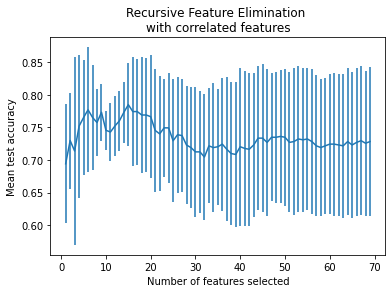

<Figure size 1440x576 with 0 Axes>

Top 10 Features:
ITSN1_N: 2.648254769275856
pAKT_N: 2.1505031413892017
pBRAF_N: 1.9874353085318262
pELK_N: 1.8861199872963383
pCREB_N: 1.406698257676596
pCAMKII_N: 1.3458988398347285
NR1_N: 1.210693551941966
PKCA_N: 1.1677642331135898
pERK_N: 1.1447400796558114
pMEK_N: 1.0073937072059


In [32]:
min_features_to_select = 1  # Minimum number of features to consider
clf_linear = SVC(kernel="linear")
cv = StratifiedKFold(5)
print("Binary Classification")
rfecv_linearSVC_y1 = RFECV(estimator=clf_linear,step=1,cv=cv,scoring="accuracy",n_jobs=-1,)#here if scoring changed
rfecv_linearSVC_y1.fit(X_train, y1)
X_train_svm_lnear_recv_y1=rfecv_linearSVC_y1.fit_transform(X_train,y1)
print(f"Optimal number of features: {rfecv_linearSVC_y1.n_features_}")
print("New Feature Array",X_train_svm_lnear_recv_y1.shape)
n_scores = len(rfecv_linearSVC_y1.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_linearSVC_y1.cv_results_["mean_test_score"],
    yerr=rfecv_linearSVC_y1.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.figure(figsize=(20, 8))
plt.show()
importances = abs(rfecv_linearSVC_y1.estimator_.coef_[0])
feature_names = datafile.iloc[:, :-2].columns

# Get the indices of the most important features
indices = importances.argsort()[::-1][:10]

# Print the names and importances of the most important features
print("Top 10 Features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")


Quatenary Classification
Optimal number of features: 34
New Feature Array (762, 34)


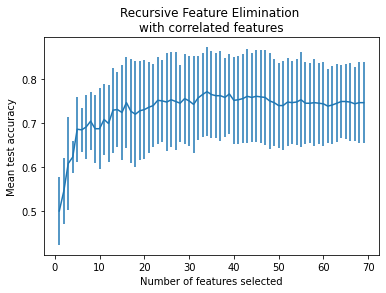

<Figure size 1440x576 with 0 Axes>

Top 10 Features:
pNR2B_N: 0.30427576001886686
CREB_N: 0.2994088444912501
pMTOR_N: 0.27399201663729483
NR1_N: 0.23685512093547093
SOD1_N: 0.21170469349571697
pRSK_N: 0.20783201731669676
pAKT_N: 0.20342626216277954
APP_N: 0.18851424405615858
GSK3B_N: 0.14372387665097508
Bcatenin_N: 0.13579632231559213


In [33]:
min_features_to_select = 1  # Minimum number of features to consider
clf_linear = SVC(kernel="linear")
cv = StratifiedKFold(5)
print("Quatenary Classification")
rfecv_linearSVC_y2 = RFECV(estimator=clf_linear,step=1,cv=cv,scoring="accuracy",n_jobs=-1,)#here if scoring changed
rfecv_linearSVC_y2.fit(X_train, y2)
X_train_svm_lnear_recv_y2=rfecv_linearSVC_y2.fit_transform(X_train,y2)
print(f"Optimal number of features: {rfecv_linearSVC_y2.n_features_}")
print("New Feature Array",X_train_svm_lnear_recv_y2.shape)
n_scores = len(rfecv_linearSVC_y2.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_linearSVC_y2.cv_results_["mean_test_score"],
    yerr=rfecv_linearSVC_y2.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.figure(figsize=(20, 8))
plt.show()
importances = abs(rfecv_linearSVC_y2.estimator_.coef_[0])
feature_names = datafile.iloc[:, :-2].columns

# Get the indices of the most important features
indices = importances.argsort()[::-1][:10]

# Print the names and importances of the most important features
print("Top 10 Features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")


Observation : Number of features changes by changing scoring to accuracy to f1

(B) For SVM with rbf Kernel

I tried this  below given code but wasn't able to resolve the Value Error: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [34]:
# min_features_to_select = 1  # Minimum number of features to consider
# clf_rbf = SVC(kernel="rbf")
# cv = StratifiedKFold(5)

# # rfe_rbf = RFECV(estimator=svc_rbf, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
# # rfe_rf = RFECV(estimator=rf, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
# rfecv_rbfSVC = RFECV(estimator=clf_rbf, step=1, cv=cv, scoring="accuracy", n_jobs=-1)
# rfecv_rbfSVC.fit(X_train,y1)

# X_train_svm_rbf_recv_y1 = rfecv_rbfSVC.transform(X_train)
# print(f"Optimal number of features: {rfecv_rbfSVC.n_features_}")
# print("New Feature Array", X_train_svm_rbf_recv_y1.shape)

# n_scores = len(rfecv_rbfSVC.cv_results_["mean_test_score"])
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Mean test accuracy")
# plt.errorbar(
#     range(min_features_to_select, n_scores + min_features_to_select),
#     rfecv_rbfSVC.cv_results_["mean_test_score"],
#     yerr=rfecv_rbfSVC.cv_results_["std_test_score"],
# )
# plt.title("Recursive Feature Elimination \nwith RBF kernel")
# plt.show()


(C) For Random Forest Classifier

Binary Classification
Optimal number of features: 40
New Feature Array (762, 40)


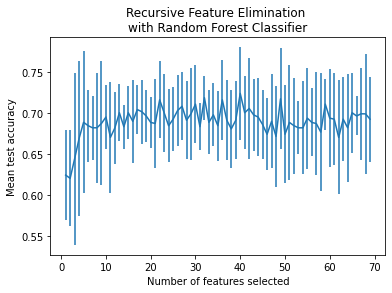

Top 10 Features:
pPKCAB_N: 0.15415729221698302
ITSN1_N: 0.07470853484867644
P38_N: 0.050621652267254805
pMTOR_N: 0.04401704408558372
SOD1_N: 0.03939813252123022
AKT_N: 0.03394707339717076
APP_N: 0.03225182392870701
RSK_N: 0.03151099138087369
ERK_N: 0.02810730432097205
BRAF_N: 0.023643388871672933


In [35]:
min_features_to_select = 1  # Minimum number of features to consider
clf_rf = RandomForestClassifier()
cv = StratifiedKFold(5)
print("Binary Classification")
# rfe_rbf = RFECV(estimator=svc_rbf, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
# rfe_rf = RFECV(estimator=rf, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
rfecv_rf_y1 = RFECV(estimator=clf_rf, step=1, cv=cv, scoring="accuracy", n_jobs=-1)
rfecv_rf_y1.fit(X_train,y1)

X_train_rf_recv_y1 = rfecv_rf_y1.transform(X_train)
print(f"Optimal number of features: {rfecv_rf_y1.n_features_}")
print("New Feature Array", X_train_rf_recv_y1.shape)

n_scores = len(rfecv_rf_y1.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_rf_y1.cv_results_["mean_test_score"],
    yerr=rfecv_rf_y1.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith Random Forest Classifier")
plt.show()
importances = rfecv_rf_y1.estimator_.feature_importances_
feature_names = datafile.iloc[:, :-2].columns

# Get the indices of the most important features
indices = importances.argsort()[::-1][:10]

# Print the names and importances of the most important features
print("Top 10 Features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")


Quatenary Classification
Optimal number of features: 53
New Feature Array (762, 53)


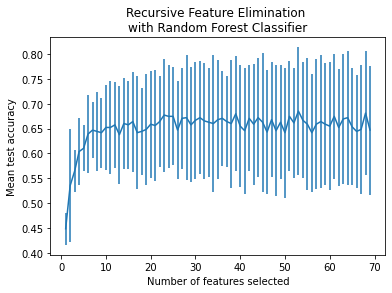

Top 10 Features:
ELK_N: 0.10742787460699868
ERBB4_N: 0.06940395750782125
pCREB_N: 0.04880715240988441
RRP1_N: 0.047562794893845066
P38_N: 0.03572599254413307
TRKA_N: 0.032083907048278994
APP_N: 0.031944386751763594
pAKT_N: 0.031049937734251222
ARC_N: 0.029142002389745687
MTOR_N: 0.0260524001560771


In [36]:
min_features_to_select = 1  # Minimum number of features to consider
clf_rf = RandomForestClassifier()
cv = StratifiedKFold(5)
print("Quatenary Classification")
# rfe_rbf = RFECV(estimator=svc_rbf, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
# rfe_rf = RFECV(estimator=rf, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
rfecv_rf_y2 = RFECV(estimator=clf_rf, step=1, cv=cv, scoring="accuracy", n_jobs=-1)
rfecv_rf_y2.fit(X_train,y2)

X_train_rf_recv_y2 = rfecv_rf_y2.transform(X_train)
print(f"Optimal number of features: {rfecv_rf_y2.n_features_}")
print("New Feature Array", X_train_rf_recv_y2.shape)

n_scores = len(rfecv_rf_y2.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_rf_y2.cv_results_["mean_test_score"],
    yerr=rfecv_rf_y2.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith Random Forest Classifier")
plt.show()
importances = rfecv_rf_y2.estimator_.feature_importances_
feature_names = datafile.iloc[:, :-2].columns

# Get the indices of the most important features
indices = importances.argsort()[::-1][:10]

# Print the names and importances of the most important features
print("Top 10 Features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")

(D) For Neural Network with single layer hidden layer

I tried this  below given code but wasn't able to resolve the Value Error: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [37]:
# clf_nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
# cv = StratifiedKFold(5)

# rfecv_nn = RFECV(estimator=clf_nn, step=1, cv=cv, scoring="accuracy", n_jobs=-1)
# rfecv_nn.fit(X_train, y1)

# X_train_rfecv_nn = rfecv_nn.transform(X_train)
# print(f"Optimal number of features: {rfecv_nn.n_features_}")
# print("New Feature Array", X_train_rfecv_nn.shape)

# n_scores = len(rfecv_nn.cv_results_["mean_test_score"])
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Mean test accuracy")
# plt.errorbar(
#     range(1, n_scores + 1),
#     rfecv_nn.cv_results_["mean_test_score"],
#     yerr=rfecv_nn.cv_results_["std_test_score"],
# )
# plt.title("Recursive Feature Elimination with Neural Network")
# plt.show()

# # Get the coefficients of the trained neural network
# importances = rfecv_nn.estimator_.coef_[0]
# feature_names = datafile.iloc[:, :-2].columns

# # Get the indices of the most important features
# indices = importances.argsort()[::-1][:10]

# # Print the names and importances of the most important features
# print("Top 10 Features:")
# for i in indices:
#     print(f"{feature_names[i]}: {importances[i]}")


In [38]:
print(" Quatenary Classification")
clf_nn = MLPClassifier(activation='relu', solver='adam', random_state=42).fit(X_train, y2)
result = permutation_importance(clf_nn, X_train, y1, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std
feature_names = datafile.iloc[:, :-2].columns
indices = importances.argsort()[::-1][:10]

# Print the names and importances of the most important features
print("Top 10 Features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]} +/- {std[i]}")

 Quatenary Classification
Top 10 Features:
pCREB_N: 0.0018372703412073421 +/- 0.0006429106936438957
pCASP9_N: 0.001574803149606291 +/- 0.0014134290832374028
SOD1_N: 0.0006561679790026143 +/- 0.0006561679790026143
P70S6_N: 0.0006561679790026143 +/- 0.0006561679790026143
pMTOR_N: 0.0005249343832020969 +/- 0.0008705051943190021
pPKCG_N: 0.0005249343832020969 +/- 0.001049868766404194
MEK_N: 0.0005249343832020914 +/- 0.0006429106936438686
ELK_N: 0.0005249343832020914 +/- 0.0006429106936438686
DSCR1_N: 0.0003937007874015741 +/- 0.0008403050180358084
S6_N: 0.00039370078740156856 +/- 0.0006013878864771349


Part 8 Testing the Model

- Here while making the model we are setting the hyperparameters to be optimal values ehich were obtained earlier.
- We have compared model for binary and quaternary classification before and after the recursive feature elimination for the Random Forest and Linear SVC.
- We have compared model for binary and quaternary classification for the rbf kernel SVM and Neural network with single hidden layer with optimal hyperparameters.

In the below code we are comparing the output for Linear SVC for binary classification before and after removing the applying the Recursive Feature Elimination

In [39]:
model1 = SVC(C= .01, kernel= 'linear')
model1.fit(X_train, y1)
model2 = SVC(C= .01, kernel= 'linear')
model2.fit(X_train_svm_lnear_recv_y1, y1) 
# print prediction results
print("Test Data for Binary Classification")
print("Data  with  features after data preprocessing")
predictions1 = model1.predict(X_test)
print(classification_report(y1_test, predictions1))
print(confusion_matrix(y1_test, predictions1))
print("Data  with  features after Recursive Feature Elimination")
predictions2=rfecv_linearSVC_y1.predict(X_test)
print(classification_report(y1_test, predictions2))
print(confusion_matrix(y1_test, predictions2))

Test Data for Binary Classification
Data  with  features after data preprocessing
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       135
           1       0.75      0.79      0.77        90

    accuracy                           0.81       225
   macro avg       0.80      0.81      0.80       225
weighted avg       0.81      0.81      0.81       225

[[111  24]
 [ 19  71]]
Data  with  features after Recursive Feature Elimination
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       135
           1       0.75      0.90      0.82        90

    accuracy                           0.84       225
   macro avg       0.84      0.85      0.84       225
weighted avg       0.85      0.84      0.84       225

[[108  27]
 [  9  81]]


We can see the sharp increase in performance matrix after feature elimination

In [40]:
model1 = SVC(C= .1,kernel= 'linear')
model1.fit(X_train, y2)
model2 = SVC(C= .1, kernel= 'linear')
model2.fit(X_train_svm_lnear_recv_y1, y2) 
# print prediction results
print("Test Data for Quatenary Classification")
print("Data  with  features after data preprocessing")
predictions1 = model1.predict(X_test)
print(classification_report(y2_test, predictions1))
print(confusion_matrix(y2_test, predictions1))
print("Data  with  features after Recursive Feature Elimination")
predictions2=rfecv_linearSVC_y2.predict(X_test)
print(classification_report(y2_test, predictions2))
print(confusion_matrix(y2_test, predictions2))

Test Data for Quatenary Classification
Data  with  features after data preprocessing
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        60
           1       0.97      0.98      0.98        60
           2       0.86      0.62      0.72        60
           3       0.98      0.96      0.97        45

    accuracy                           0.86       225
   macro avg       0.88      0.86      0.86       225
weighted avg       0.87      0.86      0.86       225

[[54  0  6  0]
 [ 0 59  0  1]
 [23  0 37  0]
 [ 0  2  0 43]]
Data  with  features after Recursive Feature Elimination
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        60
           1       0.97      0.97      0.97        60
           2       0.76      0.70      0.73        60
           3       0.96      0.96      0.96        45

    accuracy                           0.84       225
   macro avg       0.85      0.85   

In the below code we are comparing the output for SVC with rbf kernel for binary classification and Quatenary Classification.

In [41]:
model1 = SVC(C= 10, gamma= 0.001, kernel= 'rbf')
model1.fit(X_train, y1)
model2 = SVC(C= 1000, gamma= 0.00001, kernel= 'rbf')
model2.fit(X_train, y2) 
# print prediction results
print("Test Data")
print("Binary Classification")
predictions1 = model1.predict(X_test)
print(classification_report(y1_test, predictions1))
print(confusion_matrix(y1_test, predictions1))
print("Quaternary Classification")
predictions2=model2.predict(X_test)
print(classification_report(y2_test, predictions2))
print(confusion_matrix(y2_test, predictions2))

Test Data
Binary Classification
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       135
           1       0.74      0.86      0.79        90

    accuracy                           0.82       225
   macro avg       0.82      0.83      0.82       225
weighted avg       0.83      0.82      0.82       225

[[108  27]
 [ 13  77]]
Quaternary Classification
              precision    recall  f1-score   support

           0       0.70      0.92      0.79        60
           1       0.94      0.98      0.96        60
           2       0.88      0.60      0.71        60
           3       0.98      0.91      0.94        45

    accuracy                           0.85       225
   macro avg       0.87      0.85      0.85       225
weighted avg       0.86      0.85      0.85       225

[[55  0  5  0]
 [ 0 59  0  1]
 [24  0 36  0]
 [ 0  4  0 41]]


We can see that there is an increase in f1 score.



In the below code we are comparing the output for Random Forest Classifier for binary classification before and after removing the applying the Recursive Feature Elimination.

In [42]:
model1 = RandomForestClassifier(max_depth= 9, max_leaf_nodes=9, n_estimators= 25)
model1.fit(X_train, y1)
model2 = RandomForestClassifier(max_depth= 9, max_leaf_nodes=9, n_estimators= 25)
model2.fit(X_train_rf_recv_y1, y1) 
# print prediction results
print("Test Data for Binary Classification")
print("Data  with  features after data preprocessing")
predictions1 = model1.predict(X_test)
print(classification_report(y1_test, predictions1))
print(confusion_matrix(y1_test, predictions1))
print("Data  with  features after Recursive Feature Elimination")
predictions2=rfecv_linearSVC_y1.predict(X_test)
print(classification_report(y1_test, predictions2))
print(confusion_matrix(y1_test, predictions2))

Test Data for Binary Classification
Data  with  features after data preprocessing
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       135
           1       0.70      0.70      0.70        90

    accuracy                           0.76       225
   macro avg       0.75      0.75      0.75       225
weighted avg       0.76      0.76      0.76       225

[[108  27]
 [ 27  63]]
Data  with  features after Recursive Feature Elimination
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       135
           1       0.75      0.90      0.82        90

    accuracy                           0.84       225
   macro avg       0.84      0.85      0.84       225
weighted avg       0.85      0.84      0.84       225

[[108  27]
 [  9  81]]


We can see increase in both f1 score and accuracy.

In [43]:
model1 = RandomForestClassifier(max_depth= 9, max_leaf_nodes=9, n_estimators= 25)
model1.fit(X_train, y2)
model2 = RandomForestClassifier(max_depth= 9, max_leaf_nodes=9, n_estimators= 25)
model2.fit(X_train_rf_recv_y2, y2) 
# print prediction results
print("Test Data for Quatenary Classification")
print("Data  with  features after data preprocessing")
predictions1 = model1.predict(X_test)
print(classification_report(y2_test, predictions1))
print(confusion_matrix(y2_test, predictions1))
print("Data  with  features after Recursive Feature Elimination")
predictions2=rfecv_rf_y2.predict(X_test)
print(classification_report(y2_test, predictions2))
print(confusion_matrix(y2_test, predictions2))

Test Data for Quatenary Classification
Data  with  features after data preprocessing
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        60
           1       0.71      0.75      0.73        60
           2       0.82      0.60      0.69        60
           3       0.64      0.60      0.62        45

    accuracy                           0.71       225
   macro avg       0.71      0.70      0.70       225
weighted avg       0.72      0.71      0.71       225

[[52  0  8  0]
 [ 0 45  0 15]
 [24  0 36  0]
 [ 0 18  0 27]]
Data  with  features after Recursive Feature Elimination
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        60
           1       0.72      0.63      0.67        60
           2       0.78      0.70      0.74        60
           3       0.58      0.67      0.62        45

    accuracy                           0.70       225
   macro avg       0.70      0.70   

Here class with lower support has has decrease in performance metrics after recursive feature elimination.

In the below code we are comparing the output forNeural network with single ReLU hidden layer for binary classification and Quatenary Classification.

In [44]:
model1 = MLPClassifier(hidden_layer_sizes=(30,),activation='relu', solver='adam',random_state=42,alpha= 1)
model1.fit(X_train, y1)
model2 = MLPClassifier(hidden_layer_sizes=(30,),activation='relu', solver='adam',random_state=42,alpha= 0.001)
model2.fit(X_train, y2) 
# print prediction results
print("Test Data")
print("Binary Classification")
predictions1 = model1.predict(X_test)
print(classification_report(y1_test, predictions1))
print(confusion_matrix(y1_test, predictions1))
print("Quaternary Classification")
predictions2=model2.predict(X_test)
print(classification_report(y2_test, predictions2))
print(confusion_matrix(y2_test, predictions2))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Data
Binary Classification
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       135
           1       0.72      0.81      0.76        90

    accuracy                           0.80       225
   macro avg       0.79      0.80      0.79       225
weighted avg       0.80      0.80      0.80       225

[[106  29]
 [ 17  73]]
Quaternary Classification
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        60
           1       0.91      0.98      0.94        60
           2       0.93      0.87      0.90        60
           3       0.97      0.87      0.92        45

    accuracy                           0.92       225
   macro avg       0.92      0.91      0.92       225
weighted avg       0.92      0.92      0.92       225

[[56  0  4  0]
 [ 0 59  0  1]
 [ 8  0 52  0]
 [ 0  6  0 39]]


### **Objective  2** 

In [45]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torchvision.datasets import ImageFolder

cudnn.benchmark = True
plt.ion()

Here I have downloaded dataset directly from the given link and extract it using zipFile library. Earlier I was using Google Drive which would require to login to google drive(not recoomended)

In [46]:
# from google.colab import drive
# drive.mount('/content/drive')
import urllib.request
import zipfile
url='https://download.pytorch.org/tutorial/hymenoptera_data.zip'
filename = 'hymenoptera_data.zip'

# download the zip file from the URL
urllib.request.urlretrieve(url, filename)

# open the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    # extract all the files in the zip file to a folder
    zip_ref.extractall('data_folder')


In [47]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# data_dir = '/content/drive/MyDrive/hymenoptera_data/'
data_dir = 'data_folder/hymenoptera_data/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Visualising few images.

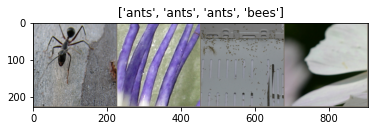

In [48]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Training the model
Now, let’s write a general function to train a model. Here, we will illustrate:

- Scheduling the learning rate

- Saving the best model

In [49]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

Visualizing the model predictions 

Generic function to display predictions for a few images

In [50]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [51]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Identity()
print(num_ftrs)
print(type(model_ft))

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

512
<class 'torchvision.models.resnet.ResNet'>


#### Task 10 Defining function to get image features

In [52]:
def get_resnet18_features(image_folder_path):
    # Define ResNet18 model
    resnet18 = models.resnet18(pretrained=True)
    resnet18.fc = torch.nn.Identity() # Remove final fully connected layer
    
    # Define data transformations
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Load image dataset
    image_dataset = ImageFolder(image_folder_path, transform=transform)
    resnet18_features = []
    labels = []
    for image,label in image_dataset:
            features = model_ft(image.unsqueeze(0))
            resnet18_features.append(features.detach().numpy().squeeze())
            labels.append(label)
    return (resnet18_features),np.array(labels)

In [53]:
image_datasets = ImageFolder('data_folder/hymenoptera_data/train')
train_features,labels_train = get_resnet18_features(image_datasets.root)

In [54]:
train_array = np.array(train_features)
print(labels_train.shape)
print(train_array.shape)
print(len(train_features))

(244,)
(244, 512)
244


In [55]:
image_datasets = ImageFolder('data_folder/hymenoptera_data/val')
test_features,labels_test = get_resnet18_features(image_datasets.root)
test_array = np.array(test_features)
print(labels_test.shape)
print((test_array))
print(test_array.shape)

(153,)
[[0.9029983  0.86574244 0.9426418  ... 0.91847074 1.028263   0.950998  ]
 [0.9017365  0.9482257  0.9560097  ... 0.9328947  1.0353359  1.021719  ]
 [0.7975986  0.9374626  0.99904484 ... 0.9212237  1.0359792  0.9442884 ]
 ...
 [0.938634   0.8968842  0.8957614  ... 0.9178206  0.97375345 1.0040392 ]
 [0.9051674  0.9972826  0.8801867  ... 0.8721416  1.0109453  0.9649373 ]
 [0.94048893 0.9405628  0.8899761  ... 0.9085284  1.031165   0.903254  ]]
(153, 512)


#### Task 11
In this task we have to Compare L2 regularized logistic regression, RBF kernel SVM and random forest for the test data using accuracy and f1_score and matrix.
- I have created the three different classifier i.e.   L2 regularized logistic regression, RBF kernel SVM and random forest with GridSearch CV for finding best hyperparameters in the latter two.
- I have the classification report(for f1_score and accuracy) and confusion matrix for each classifier from which we can interpret the results

In [56]:
# Load data
X_train = train_array
y_train = labels_train
X_test = test_array
y_test = labels_test


# L2 regularized logistic regression
lr = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)


# RBF kernel SVM
svm = SVC(kernel='rbf', random_state=42)
svm_params = {'C': [0.1, 1, 10,50,100], 'gamma': [0.01, 0.1, 1,10]}
svm_gs = GridSearchCV(svm, svm_params, scoring='accuracy', cv=5)
svm_gs.fit(X_train, y_train)


# Random forest
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200, 500,1000], 'max_depth': [0.5,1,2,5, 10, 20]}
rf_gs = GridSearchCV(rf, rf_params, scoring='accuracy', cv=5)
rf_gs.fit(X_train, y_train)


# Print results
print('Logistic regression:' )
print(classification_report(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print('RBF kernel SVM:' )
print("Best parameter for SVM with Kernel RBF Classification : ", svm_gs.best_params_)
print("Best score  for SVM with Kernel RBF Classification: ", svm_gs.best_score_)
print(classification_report(y_test,svm_gs.predict(X_test)))
print(confusion_matrix(y_test,svm_gs.predict(X_test)))
print('Random forest: ')
print("Best parameter for Random Forest Classification : ", rf_gs.best_params_)
print("Best score  for Random Forest Classification: ", rf_gs.best_score_)
print(classification_report(y_test, rf_gs.predict(X_test)))
print(confusion_matrix(y_test, rf_gs.predict(X_test)))


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_pa

Logistic regression:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        70
           1       0.66      0.66      0.66        83

    accuracy                           0.63       153
   macro avg       0.63      0.63      0.63       153
weighted avg       0.63      0.63      0.63       153

[[42 28]
 [28 55]]
RBF kernel SVM:
Best parameter for SVM with Kernel RBF Classification :  {'C': 10, 'gamma': 1}
Best score  for SVM with Kernel RBF Classification:  0.6066326530612245
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        70
           1       0.64      0.67      0.66        83

    accuracy                           0.62       153
   macro avg       0.62      0.62      0.62       153
weighted avg       0.62      0.62      0.62       153

[[39 31]
 [27 56]]
Random forest: 
Best parameter for Random Forest Classification :  {'max_depth': 1, 'n_estimators': 500}
Best score  for

### Findings : 
#### Objective 1 
- When we comapred before(find initially in task 5) and after finding the optimal parameters and we can say that we have find better accuracy and f1_score for both binary and quateary classification.
- Similiarly for after eliminating features using the RCECV we have found better accuracy and F1_Score for both binary and quateary classification

#### Comparison between different Models

**Binary Class**
- For binary class we have in terms of f1_score in quite less in Random Forest Classifier as compared to other models.
- Also the time taken in Random Forest to fit the data into model is high.
- Accuracy is highest in rbf kernel SVM as compared to other models for binary class.
- There in increase in both f1_score and accuracy after feature elimination using RCFEV.

**Quatenary Class**
- For f1_score  we have a least in Neural Network with Single Hidden Layer.
- For accuracy  also follow a similiar pattern
- Mostly time taken in quaternary is higher in all the models than  binary classification.

**Recursive Feature Elimination :**

It can be only done for Linear SVC and Random Forest Classifier
- In Random Forest optimal number of  for 4 features for binary classification and 25 features for quaternary numbers.
- In Linear SVC binary classification number of optimal features are 15 and for quaternary classifaction optimal number of features are 34.
- So we can say that random forest focuses on selecting less features and try to use them efficiently.

**Objective 2**

This objective focuses more on image datasets handling in machne learning. Major part of this objective is to extract  features from image dataset useing resnet 18 neural network.

- After finding the features we had compare 3 different models for classification purposes.
- The dataset provided easily implied that the problem is similiar to binary classification.
- the accuracy was minimum in RandomForest Model and slightly better in rbf kernel and linear SVM with latter leading by a value of .01
- thw F1_score follows the similiar pattern to accuracy.
- We can say that for image dataset generally we have low accuracy and f1_score of about 60%.


Code Discussed with friends : Only discussed most of the feature elimination and feature extratction in Objective i.e. Q2 Q6,Q7 in OBjective 1 and Part 10 in Objective 2.
1. Dinesh Kumar Panwar 22M1080
2. Karra Maneesha 22M1076

Resources for Objective 1 :
- https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd
- https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
- https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py
- https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
- https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
- https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/?ref=rp


Resources for Objective 2: 
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html